In [1]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

from keras import models, layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
laptop_price = pd.read_pickle('../datasets/processed/laptop_price.pkl')
laptop_price.head()

,company,typename,inches,x_screen,y_screen,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_0_gb,memory_0_type,memory_1_gb,memory_1_type,opsys,weight_kg,price_euros
0,Apple,Ultrabook,14-,2560,1600,Intel,2.3,Intel,8,128,ssd,0,empty,macOS,1.37,1339.69
1,Apple,Ultrabook,14-,1440,900,Intel,1.8,Intel,8,128,flash storage,0,empty,macOS,1.34,898.94
2,HP,Notebook,14~16,1920,1080,Intel,2.5,Intel,8,256,ssd,0,empty,Outros,1.86,575.00
3,Apple,Ultrabook,14~16,2880,1800,Intel,2.7,AMD,16,512,ssd,0,empty,macOS,1.83,2537.45
4,Apple,Ultrabook,14-,2560,1600,Intel,3.1,Intel,8,256,ssd,0,empty,macOS,1.37,1803.60


In [3]:
X_data = laptop_price.drop(columns='price_euros')
y_data = laptop_price.price_euros

columns_to_transform = ['company', 'typename', 'inches', 'cpu_manufacturer', 'gpu_manufacturer', 'memory_0_type', 
                        'memory_1_type', 'opsys']
for item in columns_to_transform:
    X_data[item] = LabelEncoder().fit_transform(X_data[item])
     
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)  
X_data.head()

,company,typename,inches,x_screen,y_screen,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_0_gb,memory_0_type,memory_1_gb,memory_1_type,opsys,weight_kg
0,1,4,0,2560,1600,1,2.3,1,8,128,3,0,0,3,1.37
1,1,4,0,1440,900,1,1.8,1,8,128,0,0,0,3,1.34
2,7,3,1,1920,1080,1,2.5,1,8,256,3,0,0,1,1.86
3,1,4,1,2880,1800,1,2.7,0,16,512,3,0,0,3,1.83
4,1,4,0,2560,1600,1,3.1,1,8,256,3,0,0,3,1.37


In [4]:
def create_network(units_1, units_2, input_shape, activation, optimizer):
    network = models.Sequential()
    network.add(layers.Dense(units_1, input_shape=input_shape, activation=activation))
    network.add(layers.Dense(units_2, activation=activation))
    network.add(layers.Dense(units_2, activation=activation))
    network.add(layers.Dense(1))
    network.compile(loss="mse", optimizer=optimizer, metrics=["mse"])
    
    return network

input_shape = (X_train.shape[1], )

model = create_network(200, 200, input_shape, 'relu', 'Adam')

history = model.fit(X_train, y_train, epochs=60, verbose=0, batch_size=10, validation_data=(X_test, y_test))
y_hat = model.predict(X_test)

print(f'Algorithm: MLP')
print(f'R2 score: {r2_score(y_test, y_hat):.02f}',)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat))
print(f'Mean Absolute Percentage Error: {round(mean_absolute_percentage_error(y_test, y_hat) * 100, 3)}%')

13/13 [==============================] - 0s 831us/step
Algorithm: MLP
R2 score: 0.66
Mean Absolute Error: 286.84817773062855
Mean Absolute Percentage Error: 29.407%


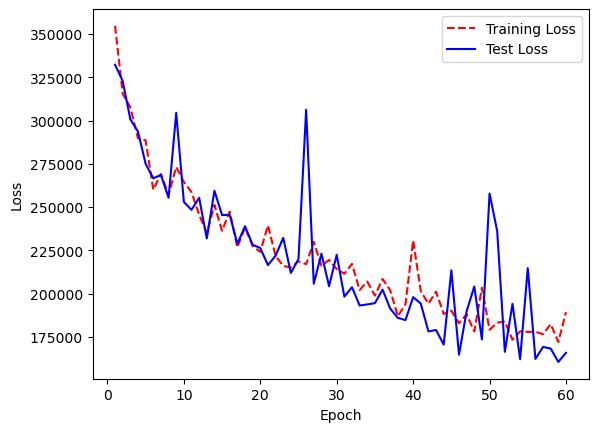

In [5]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()